# wine data로 해보기!!

### 1. 일단 전처리 없이 해보기

In [1]:
import torch
import torch.nn as nn
import numpy as np

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [3]:
import torch
from torch import nn, optim
from sklearn.datasets import load_iris, load_wine

In [10]:
import torch
from torch import nn, optim
from sklearn.datasets import load_wine
from torch.utils.data import  TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

wine = load_wine()

input = wine.data
output = wine.target

X_train, X_test, y_train, y_test = train_test_split(input, output, test_size=0.33, random_state=42,stratify=wine.target,shuffle = True)

X_train = torch.FloatTensor(X_train).to(device)
y_train = torch.LongTensor(y_train).to(device)
X_test = torch.FloatTensor(X_test)
y_test = torch.LongTensor(y_test)

In [12]:
print(X_train[0])
print(y_train[0])

tensor([1.3750e+01, 1.7300e+00, 2.4100e+00, 1.6000e+01, 8.9000e+01, 2.6000e+00,
        2.7600e+00, 2.9000e-01, 1.8100e+00, 5.6000e+00, 1.1500e+00, 2.9000e+00,
        1.3200e+03], device='cuda:0')
tensor(0, device='cuda:0')


input 변수가 13개 
와인 class 3개

In [8]:
 model = nn.Sequential(
          nn.Linear(13, 100, bias=True), # input_layer = 2, hidden_layer1 = 10 
          nn.Sigmoid(),
          nn.Linear(100, 100, bias=True), # hidden_layer1 = 10, hidden_layer2 = 10
          nn.Sigmoid(),
          nn.Linear(100, 3, bias=True), # hidden_layer3 = 10, output_layer = 1
          nn.Softmax()
          ).to(device)

In [9]:
loss_fn = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=4)

In [10]:
losses = []
for epoch in range(100):

    optimizer.zero_grad()
    # forward 연산
    hypothesis = model(X_train)

    # 비용 함수
    cost = loss_fn(hypothesis, y_train)
    cost.backward()
    optimizer.step()
    losses.append(cost.item()) # 값만 가져오기 위해서 .item()

    # 10의 배수에 해당되는 에포크마다 비용을 출력
    if epoch % 10 == 0:
        print(epoch, cost.item())

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


0 1.0901678800582886
10 1.147676706314087
20 1.1469472646713257
30 1.1459542512893677
40 1.1454975605010986
50 1.1174423694610596
60 1.0882004499435425
70 1.0851620435714722
80 1.0850049257278442
90 1.0850050449371338


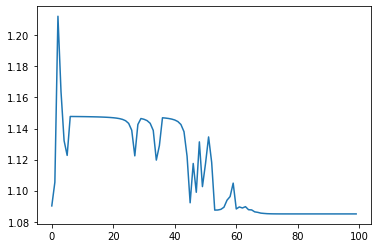

In [11]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.show()

In [12]:
with torch.no_grad():

    model = model.to('cpu')
    y_pred = model(X_test)

    y_pred = y_pred.detach().numpy() # tensor를 numpy로 바꿈
    predicted = np.argmax(y_pred,axis=1)
    print(f'model의 output은 :  {y_pred[0]}' )
    print(f'argmax를 한 후의 output은 {predicted[0]}')
    accuracy = (accuracy_score(predicted,y_test))
    print(f'accuracy는 {accuracy}')

model의 output은 :  [0.3300638  0.53770226 0.13223396]
argmax를 한 후의 output은 1
accuracy는 0.3898305084745763


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [4]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [21]:
roc_score = roc_auc_score(y_test, y_pred, multi_class='ovr')
print(roc_score)

0.4260195483653522


# 전처리 ( 상관계수가 높은 변수만 데리고 와서 해보기)

In [5]:
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
dataset = datasets.load_wine()

In [6]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target

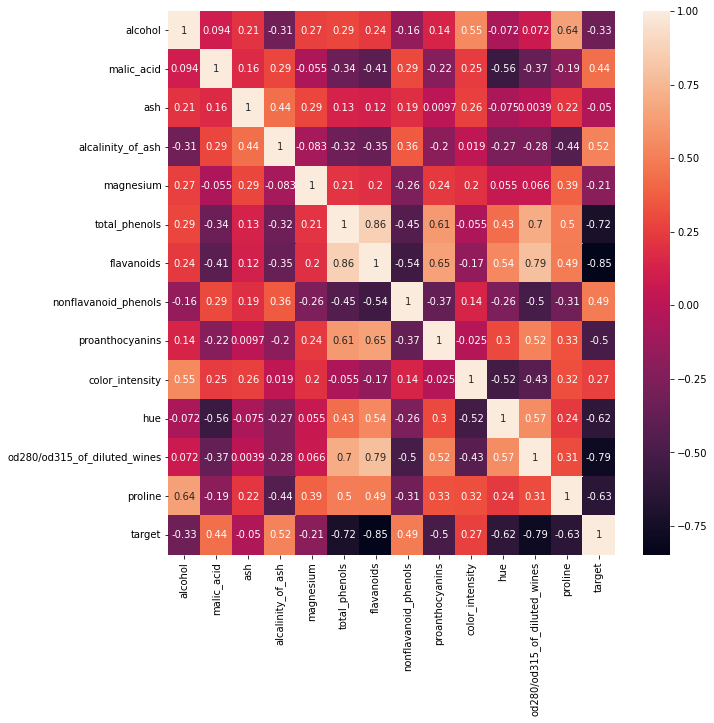

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

alcohol, ash, magnesium, color_intensity 뺴고 만든 데이터 셋으로 해보기! why? 상관계수의 절댓값이 낮음

In [8]:
wine2 = pd.DataFrame(df.drop(['alcohol','ash','magnesium','color_intensity'],axis = 1))

In [11]:
input2 = wine2.drop('target', axis = 1).to_numpy()
output2 = wine2['target'].to_numpy()

X_train2, X_test2, y_train2, y_test2 = train_test_split(input2, output2, test_size=0.33, random_state=42,stratify=wine.target,shuffle = True)

X_train2 = torch.FloatTensor(X_train2).to(device)
y_train2 = torch.LongTensor(y_train2).to(device)
X_test2 = torch.FloatTensor(X_test2)
y_test2 = torch.LongTensor(y_test2)

In [12]:
print(X_train2[0])
print(y_train2[0])

tensor([1.7300e+00, 1.6000e+01, 2.6000e+00, 2.7600e+00, 2.9000e-01, 1.8100e+00,
        1.1500e+00, 2.9000e+00, 1.3200e+03], device='cuda:0')
tensor(0, device='cuda:0')


input 9개 class는 여전히 3개

In [20]:
 model2 = nn.Sequential(
          nn.Linear(9, 100, bias=True), 
          nn.Sigmoid(),
          nn.Linear(100, 100, bias=True), 
          nn.Sigmoid(),
          nn.Linear(100, 100, bias=True), 
          nn.Sigmoid(),
          nn.Linear(100, 3, bias=True), 
          nn.Softmax()
          ).to(device)

신경망도 한 레이어 추가했다.

In [21]:
loss_fn = nn.CrossEntropyLoss().to(device)
optimizer2 = optim.SGD(model2.parameters(), lr=4)

In [22]:
losses2 = []
for epoch in range(100):

    optimizer2.zero_grad()
    # forward 연산
    hypothesis2 = model2(X_train2)

    # 비용 함수
    cost2 = loss_fn(hypothesis2, y_train2)
    cost2.backward()
    optimizer2.step()
    losses2.append(cost2.item()) # 값만 가져오기 위해서 .item()

    # 10의 배수에 해당되는 에포크마다 비용을 출력
    if epoch % 10 == 0:
        print(epoch, cost2.item())

0 1.103253960609436
10 1.1477066278457642
20 1.14693021774292
30 1.147409439086914
40 1.1371831893920898
50 1.1551506519317627
60 1.1355373859405518
70 1.086457371711731
80 1.0864838361740112
90 1.0857256650924683


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [23]:
with torch.no_grad():

    model2 = model2.to('cpu')
    y_pred2 = model2(X_test2)

    y_pred2 = y_pred2.detach().numpy() # tensor를 numpy로 바꿈
    predicted2 = np.argmax(y_pred2,axis=1)
    print(f'model의 output은 :  {y_pred2[0]}' )
    print(f'argmax를 한 후의 output은 {predicted2[0]}')
    accuracy = (accuracy_score(predicted2,y_test2))
    print(f'accuracy는 {accuracy}')

model의 output은 :  [0.29788572 0.5712858  0.13082851]
argmax를 한 후의 output은 1
accuracy는 0.3898305084745763


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [24]:
roc_score = roc_auc_score(y_test2, y_pred2, multi_class='ovr')
print(roc_score)

0.7980593868738458


전처리도 하고 레이어도 추가하니 roc 점수가 유의미하게 증가하였다!